In [1]:


from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split

import tensorflow

from tensorflow.keras import backend as K

from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical

import utils

# Image prediction

Correctly classify one of three classes with


- model from scratch
- pre-trained model

## Steps

- prepare data into X, y arrays
- train model from scratch
- write function that takes image(s) and outputs label
- write function that displays image and writes label + probs on image

In [2]:
path = "../00_data/"
categories = utils.os.listdir(path)

imgs = utils.read_imgs(path_base=path, dir_categories=categories)


In [3]:
type(imgs['X'])

numpy.ndarray

In [4]:
imgs['X'][1].shape

(224, 224, 3)

Text(150, 150, 'pen')

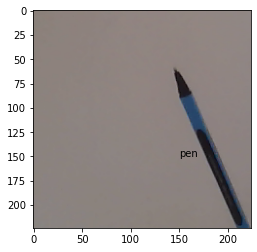

In [7]:
plt.imshow(imgs['X'][600]/255)
plt.text(150, 150, s = imgs['y'][600])

## Prep Model data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(imgs['X'], imgs['y_label_numeric'], test_size=0.15)

## Model Development

CNN, few parameters

In [9]:
# Clear session before starting the model building
K.clear_session()


In [16]:

model = models.Sequential([
    
    # 1st Conv
    layers.Conv2D(
      filters=5,
      kernel_size=(4,4),
      strides=(2,2),
      padding="same",
      activation="relu",
      input_shape=(224, 224, 3)),
    # Pool
    layers.MaxPooling2D(pool_size=(3,3),
                # strides=(2,2),
                padding="same"),
    # 2nd Conv
    layers.Conv2D(
      filters=20,
        kernel_size=(3,3),
        strides=(1,1),
        padding="same",
        activation="relu"),
    # Pool
    layers.MaxPooling2D(pool_size=(3,3),
                  strides=(2,2),
                  padding="same"),
    
    # Flatten
    layers.Flatten(),
    # FC1
    layers.Dense(units=1000, activation="relu"),
    layers.Dropout(0.1),
    # FC2
    layers.Dense(units=250, activation="relu"),
    layers.Dropout(0.1),
    # Output layer
    layers.Dense(units=3, activation="softmax")
])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 5)       1505      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 20)        2520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7220)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              7221000   
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

In [17]:
model.compile(
    # loss function to optimize
    loss=tensorflow.keras.losses.CategoricalCrossentropy(),
    # evaluation metric
    metrics=['accuracy']
)

In [18]:
results = model.fit(
    X_train, to_categorical(y_train), 
    epochs=40, # number of iterations through the complete dataset            
    batch_size=int(10*10), # number of observations used when updating weights, gradient        
    validation_split=0.2, # 20% of the data is used for validation
    verbose =False
)

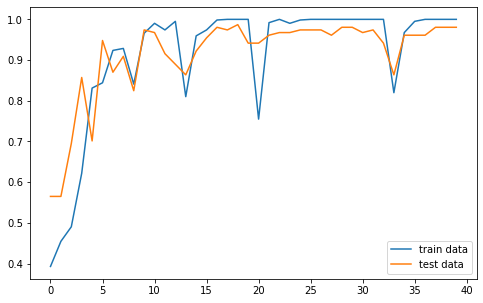

In [19]:
# plot the accuracy

# plot the validation accuracy

plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(model.history.history["accuracy"], label="train data")
plt.plot(model.history.history["val_accuracy"], label="test data")
plt.legend();

In [20]:
ypred = model.predict(X_test)
utils.np.argmax(ypred, axis=1)


array([0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2,
       1, 2, 2, 2])

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

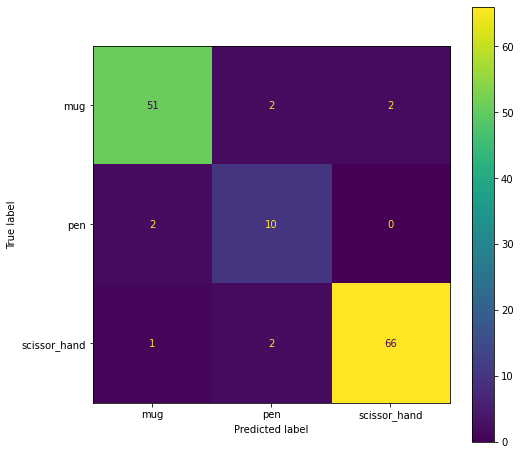

In [29]:
plt.rcParams["figure.figsize"] = (8, 8)
cm = confusion_matrix(y_true=y_test, y_pred=utils.np.argmax(ypred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=utils.np.unique(categories))
disp.plot();

## Transfer learning

In [39]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import numpy as np
import pandas as pd
import os
plt.rcParams['figure.figsize'] = (10, 10)

import warnings
warnings.filterwarnings("ignore")

In [40]:
base_model = keras.applications.vgg16.VGG16(weights="imagenet", input_shape=(224,224,3), include_top=False)


for layers in base_model.layers[:]:
    layers.trainable = False  # all the layers are frozen, it means they are not trainable

58900480/58889256 [==============================] - 34s 1us/step


In [49]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [55]:
K.clear_session()
new_model = keras.models.Sequential([
    
    # Base model
    base_model,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=3, activation=keras.activations.softmax, name='otput')

])


new_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                   metrics=['accuracy']
                 )

In [54]:
y_train_cat = to_categorical(y_train)

In [56]:
history = new_model.fit(X_train,y_train_cat,batch_size=20, epochs=10)

Epoch 1/10
39/39 [==============================] - 136s 4s/step - loss: 0.6500 - accuracy: 0.9377
Epoch 2/10
39/39 [==============================] - 140s 4s/step - loss: 0.0076 - accuracy: 0.9974
Epoch 3/10
39/39 [==============================] - 145s 4s/step - loss: 1.6572e-05 - accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 149s 4s/step - loss: 6.6562e-06 - accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 159s 4s/step - loss: 4.7611e-06 - accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 146s 4s/step - loss: 3.7365e-06 - accuracy: 1.0000
Epoch 7/10
39/39 [==============================] - 135s 3s/step - loss: 3.0337e-06 - accuracy: 1.0000
Epoch 8/10
39/39 [==============================] - 138s 4s/step - loss: 2.5600e-06 - accuracy: 1.0000
Epoch 9/10
39/39 [==============================] - 145s 4s/step - loss: 2.1402e-06 - accuracy: 1.0000
Epoch 10/10
39/39 [==============================] - 146s 4s/step - loss: 1.8670e

In [57]:
new_model.save('vgg_retrained.h5')

In [61]:
plt.rcParams["figure.figsize"] = (8, 8)
ypred_new = utils.np.argmax(new_model.predict(X_test), axis=1)


In [62]:
ypred_new

array([0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2,
       1, 2, 2, 2])

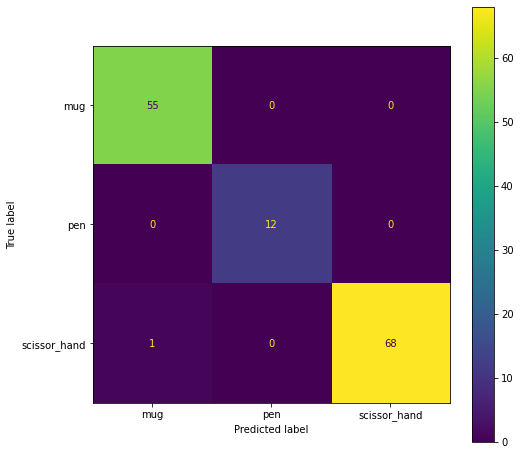

In [63]:

cm = confusion_matrix(y_true=y_test, y_pred=ypred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=utils.np.unique(categories))
disp.plot();

In [68]:
100 % 30 == 0

False